In [1]:
from data_cleaning import add_ranks, clean_results_df
from visualizations import (
    get_top_12_df,
    melt_rank_df,
    race_progression_plot,
    race_progression_plot_interactive,
    top_12_plot,
    top_12_plot_interactive,
)
from web_scrape_results import scrape_results

Men West


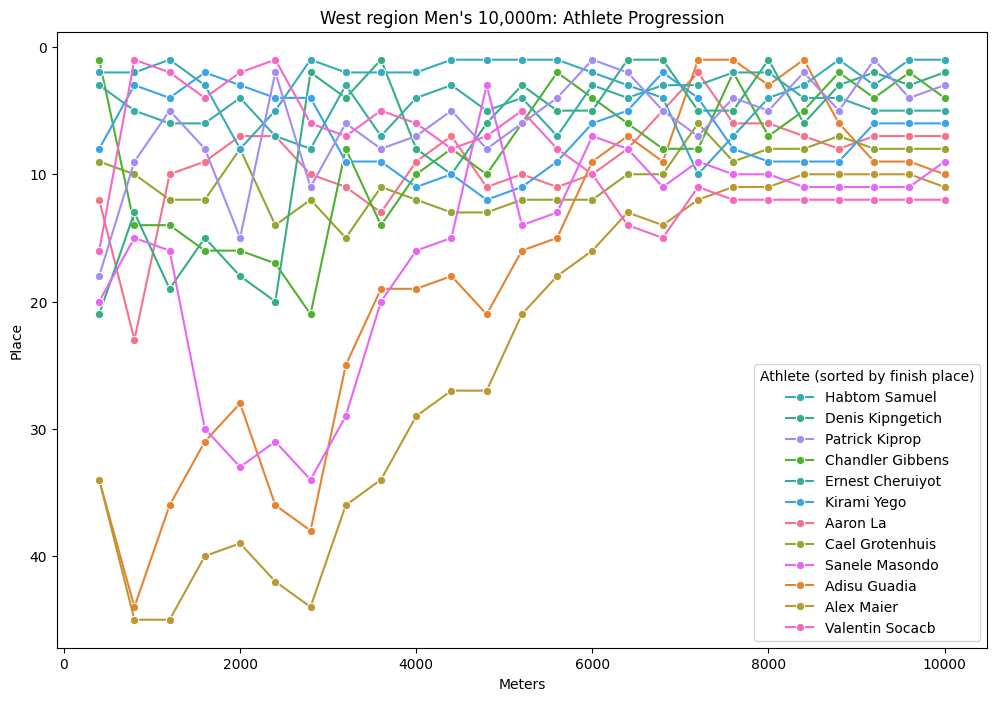

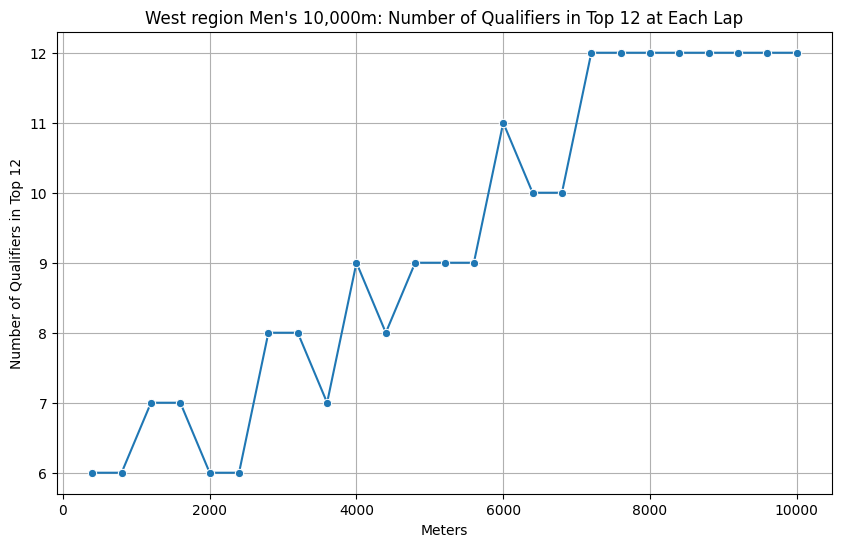

Men East


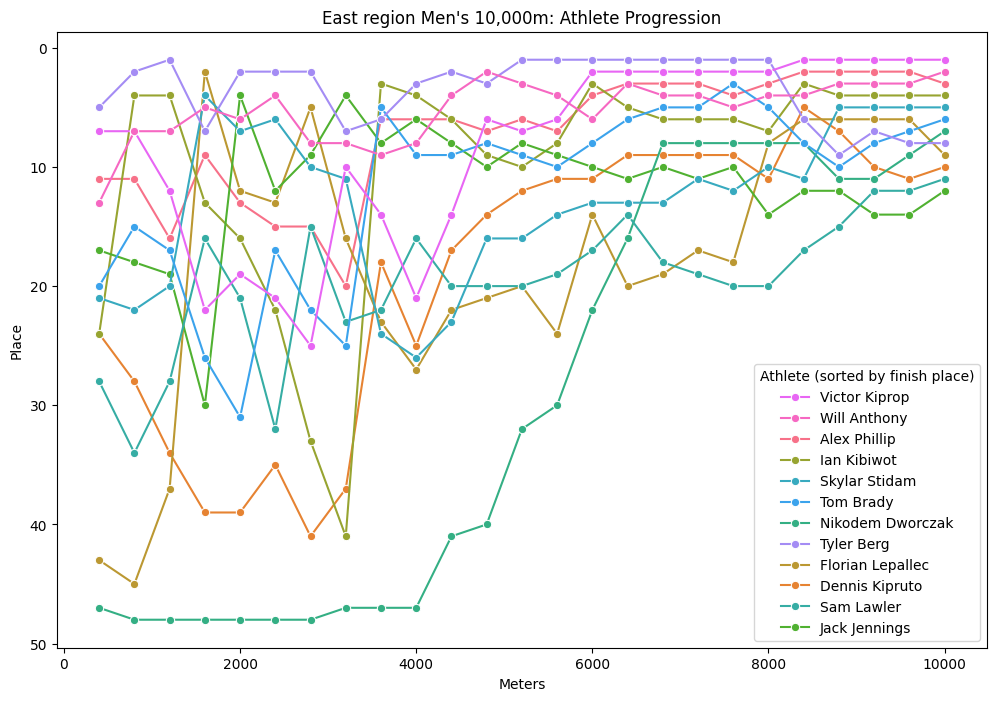

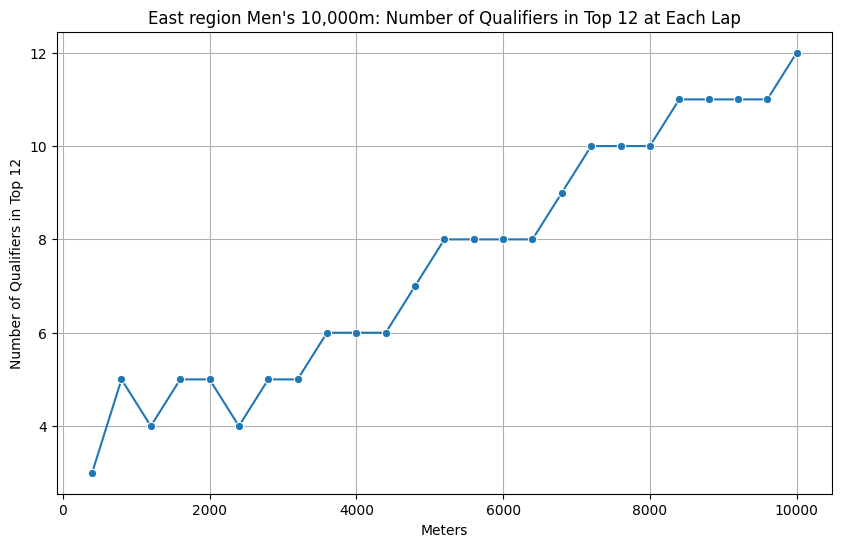

Women West


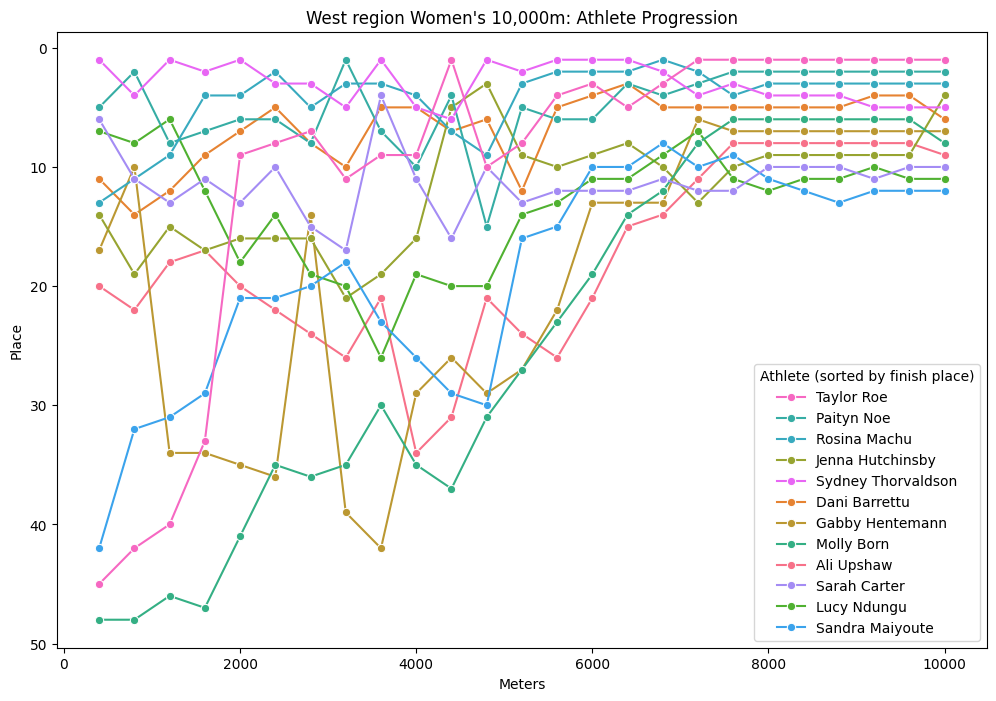

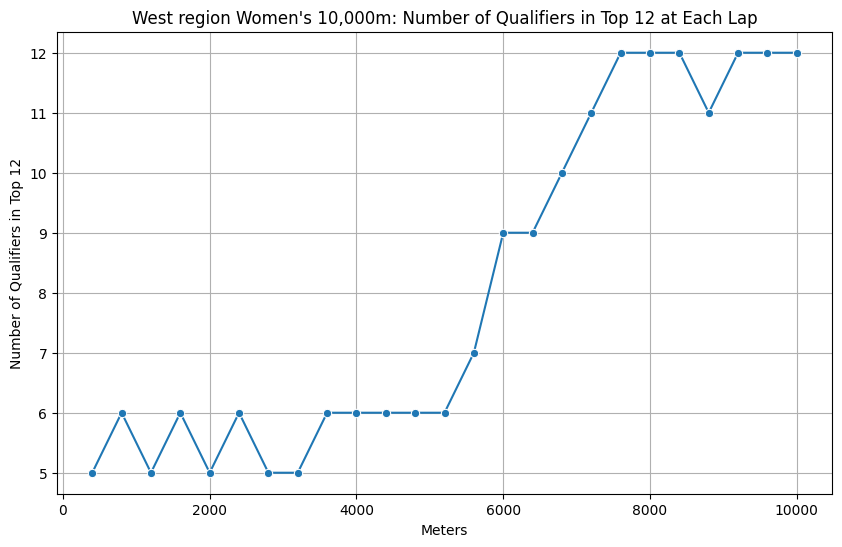

Women East


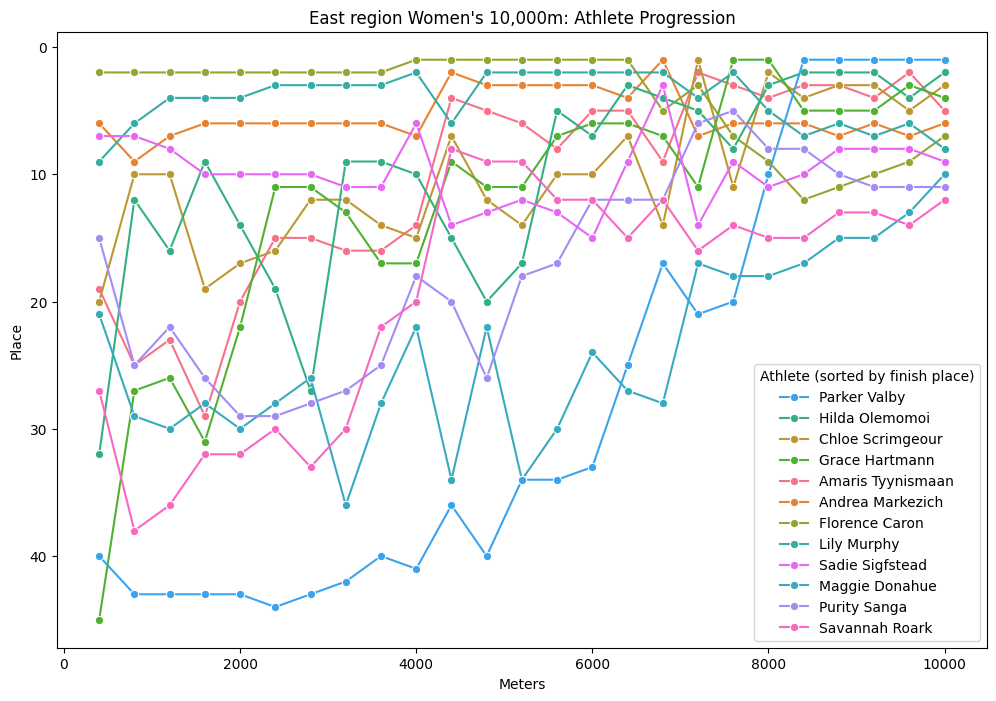

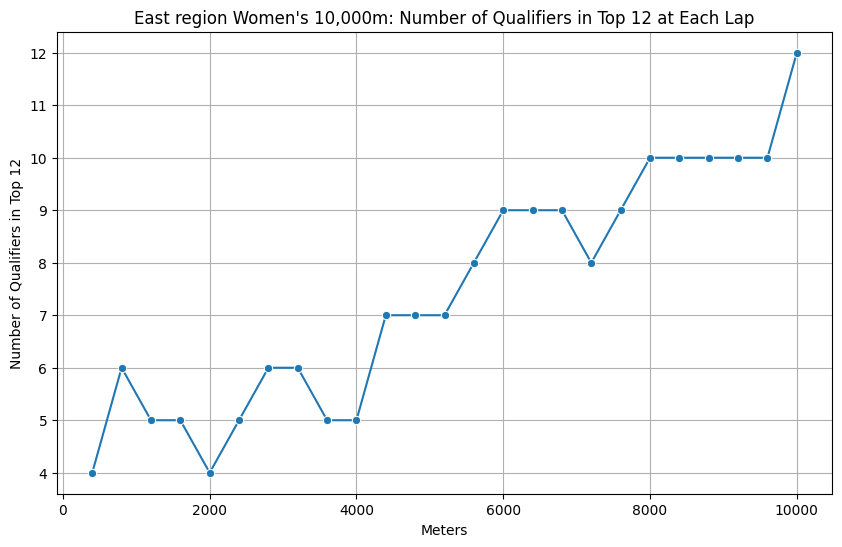

In [2]:
# Result pages for 10,000m regionals races
urls = [
    'https://flashresults.ncaa.com/Outdoor/2024/FirstRounds/West/008-1-01.htm',
    'https://flashresults.ncaa.com/Outdoor/2024/FirstRounds/East/008-1-01.htm',
    'https://flashresults.ncaa.com/Outdoor/2024/FirstRounds/West/028-1-01.htm',
    'https://flashresults.ncaa.com/Outdoor/2024/FirstRounds/East/028-1-01.htm'
    ]
genders = ['Men','Men','Women','Women']
regions = ['West','East','West','East']
# Loop through the 4 race results
for url, gender, region in zip(urls, genders, regions):
    print(gender, region)
    # Scrape results from internet
    df = scrape_results(url)
    # Do some data cleaning
    clean_df = clean_results_df(df)
    # Add ranks per lap
    rank_df = add_ranks(clean_df)
    # Format data tables for plotting
    melted_rank_df = melt_rank_df(rank_df)
    top_12_df = get_top_12_df(melted_rank_df)
    # Plot race progression
    race_progression_plot(melted_rank_df, gender, region)
    race_progression_plot_interactive(melted_rank_df, gender, region)
    # Plot number of qualifiers in top 12
    top_12_plot(top_12_df, gender, region)
    top_12_plot_interactive(top_12_df, gender, region)